# Special Eigen-Cases: Exploring Unique Scenarios

## 🎯 Learning Objectives

In this notebook, we'll explore **special cases** of eigenvalue problems that provide deeper insights into the behavior of linear transformations. We'll cover:

1. **Uniform Scaling** - When every vector becomes an eigenvector
2. **180° Rotation** - The special case where rotation has eigenvectors  
3. **Combined Transformations** - Shear + scaling combinations
4. **3D Rotations** - Finding axes of rotation through eigenvectors

## 📚 Quick Recap

**Eigenvectors** are vectors that maintain their direction after a linear transformation:
$$A\mathbf{v} = \lambda\mathbf{v}$$

**Eigenvalues** ($\lambda$) tell us how much the eigenvector is scaled:
- $\lambda > 1$: Vector gets longer
- $0 < \lambda < 1$: Vector gets shorter
- $\lambda = 1$: Vector stays same length
- $\lambda = -1$: Vector flips direction but keeps length
- $\lambda < 0$: Vector flips direction and may change length

Let's dive into the special cases!

In [5]:
# Import necessary libraries for visualization and computation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [6]:
def plot_transformation_with_eigenvectors(matrix, title, special_vectors=None, figsize=(14, 6)):
    """
    Enhanced visualization showing transformation with computed eigenvectors highlighted
    """
    # Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Create unit square vertices
    square = np.array([[-1, -1, 1, 1, -1], 
                       [-1, 1, 1, -1, -1]])
    
    # Define default test vectors if none provided
    if special_vectors is None:
        special_vectors = {
            'Horizontal': np.array([[1], [0]]), 
            'Vertical': np.array([[0], [1]]), 
            'Diagonal': np.array([[1], [1]])
        }
    
    colors = ['green', 'red', 'orange', 'purple', 'brown']
    
    # Plot original square and vectors
    ax1.plot(square[0], square[1], 'b-', linewidth=2, label='Unit Square')
    ax1.fill(square[0], square[1], 'lightblue', alpha=0.3)
    
    # Plot test vectors
    for i, (name, vector) in enumerate(special_vectors.items()):
        ax1.arrow(0, 0, vector[0,0], vector[1,0], 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], linewidth=2, 
                 label=f'{name} Vector', alpha=0.7)
    
    # Plot computed eigenvectors as dashed lines
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval) and np.isreal(eigenvec).all():
            # Extend the eigenvector line
            t = np.linspace(-3, 3, 100)
            line_x = t * eigenvec[0]
            line_y = t * eigenvec[1]
            ax1.plot(line_x, line_y, '--', linewidth=2, alpha=0.8,
                    label=f'Eigenvector line (λ={eigenval:.2f})')
    
    ax1.set_xlim(-2.5, 2.5)
    ax1.set_ylim(-2.5, 2.5)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.set_title('Before Transformation')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Apply transformation
    transformed_square = matrix @ square
    transformed_vectors = {}
    
    # Plot transformed square and vectors
    ax2.plot(transformed_square[0], transformed_square[1], 'b-', linewidth=2, label='Transformed Square')
    ax2.fill(transformed_square[0], transformed_square[1], 'lightblue', alpha=0.3)
    
    for i, (name, vector) in enumerate(special_vectors.items()):
        transformed_vector = matrix @ vector
        transformed_vectors[name] = transformed_vector
        ax2.arrow(0, 0, transformed_vector[0,0], transformed_vector[1,0], 
                 head_width=0.1, head_length=0.1, 
                 fc=colors[i], ec=colors[i], linewidth=2, 
                 label=f'Transformed {name}', alpha=0.7)
    
    # Plot eigenvector lines (should remain the same)
    for i, (eigenval, eigenvec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(eigenval) and np.isreal(eigenvec).all():
            t = np.linspace(-3, 3, 100)
            line_x = t * eigenvec[0]
            line_y = t * eigenvec[1]
            ax2.plot(line_x, line_y, '--', linewidth=2, alpha=0.8,
                    label=f'Eigenvector line (unchanged)')
            
            # Show the actual transformed eigenvector
            transformed_eigenvec = matrix @ eigenvec
            ax2.arrow(0, 0, transformed_eigenvec[0], transformed_eigenvec[1], 
                     head_width=0.15, head_length=0.15, 
                     fc='black', ec='black', linewidth=3, alpha=0.9)
    
    ax2.set_xlim(-2.5, 2.5)
    ax2.set_ylim(-2.5, 2.5)
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    ax2.set_title('After Transformation')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return eigenvalues, eigenvectors, transformed_vectors

def analyze_eigenvalues(matrix, name):
    """Compute and analyze eigenvalues and eigenvectors"""
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    print(f"\n🔬 Analysis: {name}")
    print("="*50)
    print(f"Matrix:\n{matrix}")
    print(f"\nEigenvalues: {eigenvalues}")
    print(f"Eigenvectors:")
    
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        if np.isreal(val) and np.isreal(vec).all():
            print(f"  λ_{i+1} = {val:.3f} (real)")
            print(f"  v_{i+1} = [{vec[0]:.3f}, {vec[1]:.3f}]")
        else:
            print(f"  λ_{i+1} = {val:.3f} (complex)")
            print(f"  v_{i+1} = [{vec[0]:.3f}, {vec[1]:.3f}] (complex)")
        
        # Verify the eigenvalue equation: Av = λv
        Av = matrix @ vec
        lambda_v = val * vec
        verification = np.allclose(Av, lambda_v)
        print(f"    Verification Av = λv: {'✅' if verification else '❌'}")
        print()
    
    return eigenvalues, eigenvectors

print("✅ Visualization functions created!")

✅ Visualization functions created!


## Case 1: Uniform Scaling 🔍

**Uniform scaling** means scaling by the **same factor** in all directions. This creates a very special situation where **every vector becomes an eigenvector**!

### Mathematical Definition

A uniform scaling matrix has the form:
$$A = k \cdot I = \begin{bmatrix} k & 0 \\ 0 & k \end{bmatrix}$$

where $k$ is the scaling factor and $I$ is the identity matrix.

### Why Every Vector is an Eigenvector

For any vector $\mathbf{v}$:
$$A\mathbf{v} = k \cdot I \cdot \mathbf{v} = k\mathbf{v}$$

This means **every vector** satisfies the eigenvalue equation with eigenvalue $\lambda = k$!

Let's visualize this with a scaling factor of 1.5:

🔍 Case 1: Uniform Scaling Matrix
[[1.5 0. ]
 [0.  1.5]]



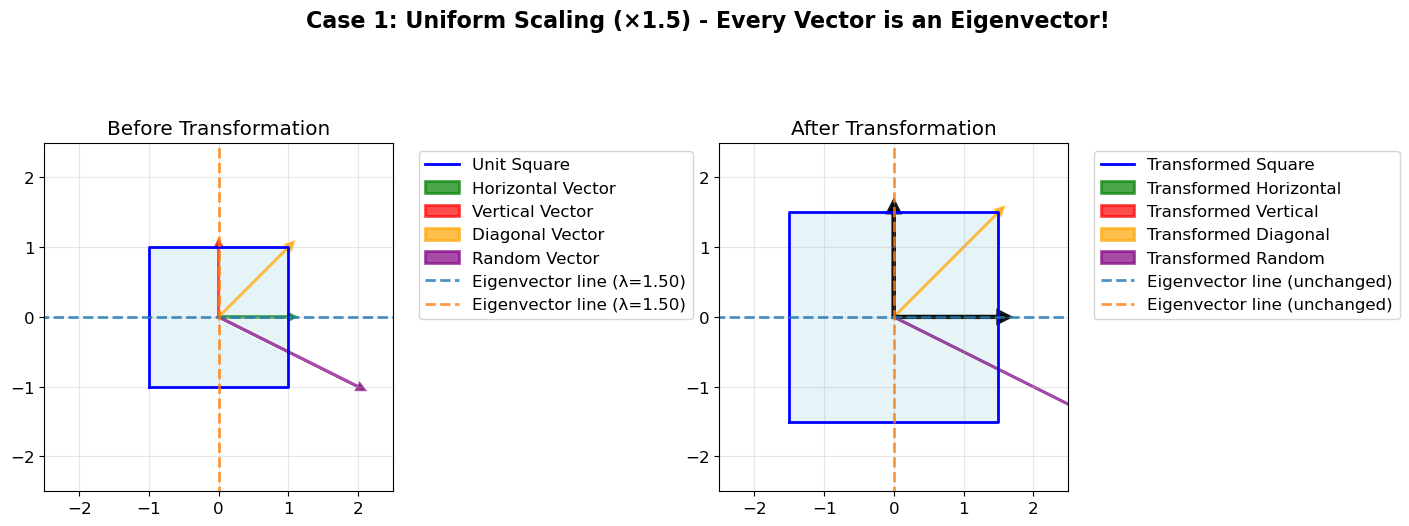


🔬 Analysis: Uniform Scaling
Matrix:
[[1.5 0. ]
 [0.  1.5]]

Eigenvalues: [1.5 1.5]
Eigenvectors:
  λ_1 = 1.500 (real)
  v_1 = [1.000, 0.000]
    Verification Av = λv: ✅

  λ_2 = 1.500 (real)
  v_2 = [0.000, 1.000]
    Verification Av = λv: ✅

🧪 Testing Random Vectors:
Random vector 1: [-1.92, 1.08]
  Is eigenvector with λ=1.5? ✅ YES
Random vector 2: [0.06, -1.48]
  Is eigenvector with λ=1.5? ✅ YES
Random vector 3: [1.00, -1.72]
  Is eigenvector with λ=1.5? ✅ YES

🎯 Key Insight: In uniform scaling, EVERY vector is an eigenvector with the same eigenvalue!


In [7]:
# Case 1: Uniform Scaling by factor 1.5
uniform_scaling = np.array([[1.5, 0],
                           [0, 1.5]])

print("🔍 Case 1: Uniform Scaling Matrix")
print(uniform_scaling)
print()

# Let's test with multiple vectors to show they're ALL eigenvectors
test_vectors = {
    'Horizontal': np.array([[1], [0]]), 
    'Vertical': np.array([[0], [1]]), 
    'Diagonal': np.array([[1], [1]]),
    'Random': np.array([[2], [-1]])
}

eigenvals, eigenvecs, transformed = plot_transformation_with_eigenvectors(
    uniform_scaling, 
    "Case 1: Uniform Scaling (×1.5) - Every Vector is an Eigenvector!",
    test_vectors
)

# Analyze the results
analyze_eigenvalues(uniform_scaling, "Uniform Scaling")

# Test our claim: every vector should be an eigenvector
print("🧪 Testing Random Vectors:")
print("="*30)

# Generate some random vectors and test
for i in range(3):
    random_vector = np.random.randn(2, 1)
    transformed_random = uniform_scaling @ random_vector
    expected = 1.5 * random_vector
    
    is_eigenvector = np.allclose(transformed_random, expected)
    print(f"Random vector {i+1}: [{random_vector[0,0]:.2f}, {random_vector[1,0]:.2f}]")
    print(f"  Is eigenvector with λ=1.5? {'✅ YES' if is_eigenvector else '❌ NO'}")

print("\n🎯 Key Insight: In uniform scaling, EVERY vector is an eigenvector with the same eigenvalue!")

## Case 2: 180° Rotation 🔄

Most rotations have **no real eigenvectors** because they change the direction of every vector. However, **180° rotation** is special - it's the only pure rotation in 2D that has eigenvectors!

### Why 180° Rotation is Special

A 180° rotation flips every vector to point in the **exact opposite direction**:

$$R_{180°} = \begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix} = -I$$

This means for any vector $\mathbf{v}$:
$$R_{180°}\mathbf{v} = -\mathbf{v} = (-1)\mathbf{v}$$

So **every vector is an eigenvector** with eigenvalue $\lambda = -1$!

### Key Properties:
- ✅ **Direction preserved**: Vectors stay on the same line through origin
- ✅ **Length preserved**: $|\lambda| = |-1| = 1$
- 🔄 **Direction flipped**: All vectors point opposite direction

Let's visualize this:

🔄 Case 2: 180° Rotation Matrix
[[-1  0]
 [ 0 -1]]



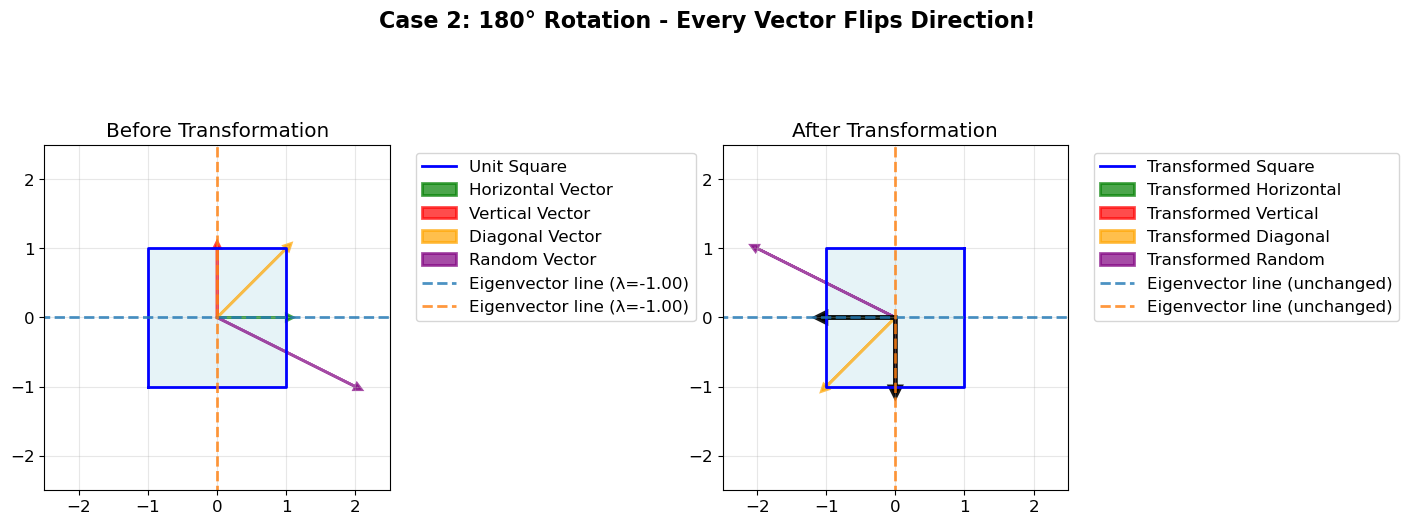


🔬 Analysis: 180° Rotation
Matrix:
[[-1  0]
 [ 0 -1]]

Eigenvalues: [-1. -1.]
Eigenvectors:
  λ_1 = -1.000 (real)
  v_1 = [1.000, 0.000]
    Verification Av = λv: ✅

  λ_2 = -1.000 (real)
  v_2 = [0.000, 1.000]
    Verification Av = λv: ✅

🔍 Comparison with Other Rotation Angles:
45° rotation:
  Eigenvalues: [0.70710678+0.70710678j 0.70710678-0.70710678j]
  Real eigenvalues: None
  Has real eigenvectors: ❌ NO

90° rotation:
  Eigenvalues: [6.123234e-17+1.j 6.123234e-17-1.j]
  Real eigenvalues: None
  Has real eigenvectors: ❌ NO

135° rotation:
  Eigenvalues: [-0.70710678+0.70710678j -0.70710678-0.70710678j]
  Real eigenvalues: None
  Has real eigenvectors: ❌ NO

180° rotation:
  Eigenvalues: [-1.+1.2246468e-16j -1.-1.2246468e-16j]
  Real eigenvalues: None
  Has real eigenvectors: ❌ NO

🎯 Key Insight: Only 180° rotation has real eigenvectors in 2D!
   All vectors become eigenvectors with eigenvalue λ = -1


In [8]:
# Case 2: 180° Rotation
rotation_180 = np.array([[-1, 0],
                        [0, -1]])

print("🔄 Case 2: 180° Rotation Matrix")
print(rotation_180)
print()

# Test with the same vectors
eigenvals_180, eigenvecs_180, transformed_180 = plot_transformation_with_eigenvectors(
    rotation_180, 
    "Case 2: 180° Rotation - Every Vector Flips Direction!",
    test_vectors
)

# Analyze the results
analyze_eigenvalues(rotation_180, "180° Rotation")

# Compare with other rotation angles to show why 180° is special
print("🔍 Comparison with Other Rotation Angles:")
print("="*45)

angles = [45, 90, 135, 180]
for angle in angles:
    theta = np.radians(angle)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                               [np.sin(theta),  np.cos(theta)]])
    
    eigenvals_rot, _ = np.linalg.eig(rotation_matrix)
    real_eigenvals = [val for val in eigenvals_rot if np.isreal(val)]
    
    print(f"{angle}° rotation:")
    print(f"  Eigenvalues: {eigenvals_rot}")
    print(f"  Real eigenvalues: {real_eigenvals if real_eigenvals else 'None'}")
    print(f"  Has real eigenvectors: {'✅ YES' if real_eigenvals else '❌ NO'}")
    print()

print("🎯 Key Insight: Only 180° rotation has real eigenvectors in 2D!")
print("   All vectors become eigenvectors with eigenvalue λ = -1")

## Case 3: Combined Transformations - Shear + Scaling 🔀

Real-world transformations often combine multiple effects. Let's explore a transformation that combines:
- **Horizontal shear** 
- **Vertical scaling**

This case shows that eigenvectors can be **non-obvious** and require mathematical computation to find.

### The Matrix

We'll use a transformation that:
1. Applies a horizontal shear (adding x-component to y-coordinate)
2. Scales the y-direction by a factor

$$A = \begin{bmatrix} 1 & 0.5 \\ 0 & 2 \end{bmatrix}$$

This matrix:
- Keeps x-coordinates unchanged: $x' = x$  
- Modifies y-coordinates: $y' = 0.5x + 2y$

### Why Finding Eigenvectors is Tricky

Unlike our previous examples, the eigenvectors are **not along the standard coordinate axes**. We need to solve:

$$\det(A - \lambda I) = 0$$

to find the eigenvalues, then solve $(A - \lambda I)\mathbf{v} = \mathbf{0}$ for eigenvectors.

In [ ]:
# Case 3: Combined Transformation (Shear + Scaling)
combined_transform = np.array([[1, 0.5],
                              [0, 2]])

print("🔀 Case 3: Combined Transformation Matrix")
print(combined_transform)
print("Interpretation:")
print("  - x' = x + 0.5y  (horizontal shear)")
print("  - y' = 2y        (vertical scaling)")
print()

# Visualize the transformation
eigenvals_combined, eigenvecs_combined, transformed_combined = plot_transformation_with_eigenvectors(
    combined_transform, 
    "Case 3: Combined Transformation - Hidden Eigenvectors!",
    test_vectors
)

# Analyze the results in detail
analyze_eigenvalues(combined_transform, "Combined Transformation")

# Let's manually verify the eigenvectors
print("🔍 Manual Verification of Eigenvectors:")
print("="*45)

# Get the computed eigenvectors
v1 = eigenvecs_combined[:, 0]  # First eigenvector
v2 = eigenvecs_combined[:, 1]  # Second eigenvector
lambda1 = eigenvals_combined[0]
lambda2 = eigenvals_combined[1]

print(f"Eigenvector 1: [{v1[0]:.3f}, {v1[1]:.3f}] with λ₁ = {lambda1:.3f}")
print(f"Eigenvector 2: [{v2[0]:.3f}, {v2[1]:.3f}] with λ₂ = {lambda2:.3f}")
print()

# Verify manually
Av1 = combined_transform @ v1
lambda1_v1 = lambda1 * v1
Av2 = combined_transform @ v2  
lambda2_v2 = lambda2 * v2

print("Verification:")
print(f"Av₁ = [{Av1[0]:.3f}, {Av1[1]:.3f}]")
print(f"λ₁v₁ = [{lambda1_v1[0]:.3f}, {lambda1_v1[1]:.3f}]")
print(f"Equal? {'✅' if np.allclose(Av1, lambda1_v1) else '❌'}")
print()
print(f"Av₂ = [{Av2[0]:.3f}, {Av2[1]:.3f}]")
print(f"λ₂v₂ = [{lambda2_v2[0]:.3f}, {lambda2_v2[1]:.3f}]")
print(f"Equal? {'✅' if np.allclose(Av2, lambda2_v2) else '❌'}")

print("\n🎯 Key Insight: Eigenvectors aren't always obvious!")
print("   Mathematical computation is essential for complex transformations.")

## Case 4: 3D Rotation - Finding the Axis of Rotation 🌐

In 3D, rotations become much more interesting! Unlike 2D rotations (except 180°), **3D rotations always have at least one real eigenvector** that represents the **axis of rotation**.

### Physical Interpretation

When you rotate an object in 3D space:
- Most vectors change direction ❌
- **One special direction remains unchanged** ✅ 
- This unchanged direction is the **axis of rotation**!

### Mathematical Insight

For any 3D rotation matrix $R$, there exists a vector $\mathbf{v}$ such that:
$$R\mathbf{v} = 1 \cdot \mathbf{v}$$

This eigenvector with eigenvalue $\lambda = 1$ points along the **axis of rotation**.

### Example: Rotation around Z-axis

Let's rotate around the z-axis by 45°:

🌐 Case 4: 3D Rotation Matrix (45° around z-axis)
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

🔬 3D Rotation Analysis:
Eigenvalues: [0.70710678+0.70710678j 0.70710678-0.70710678j 1.        +0.j        ]

λ_1 = (0.7071067811865476+0.7071067811865475j)
v_1 = [0.707+0.000j, 0.000-0.707j, 0.000-0.000j]
  🌀 This is a complex eigenvalue (rotation in the xy-plane)

λ_2 = (0.7071067811865476-0.7071067811865475j)
v_2 = [0.707-0.000j, 0.000+0.707j, 0.000+0.000j]
  🌀 This is a complex eigenvalue (rotation in the xy-plane)

λ_3 = (1+0j)
v_3 = [0.000+0.000j, 0.000+0.000j, 1.000+0.000j]
  🎯 This is the AXIS OF ROTATION! (λ = 1)
  Normalized axis: [0.000, 0.000, 1.000]



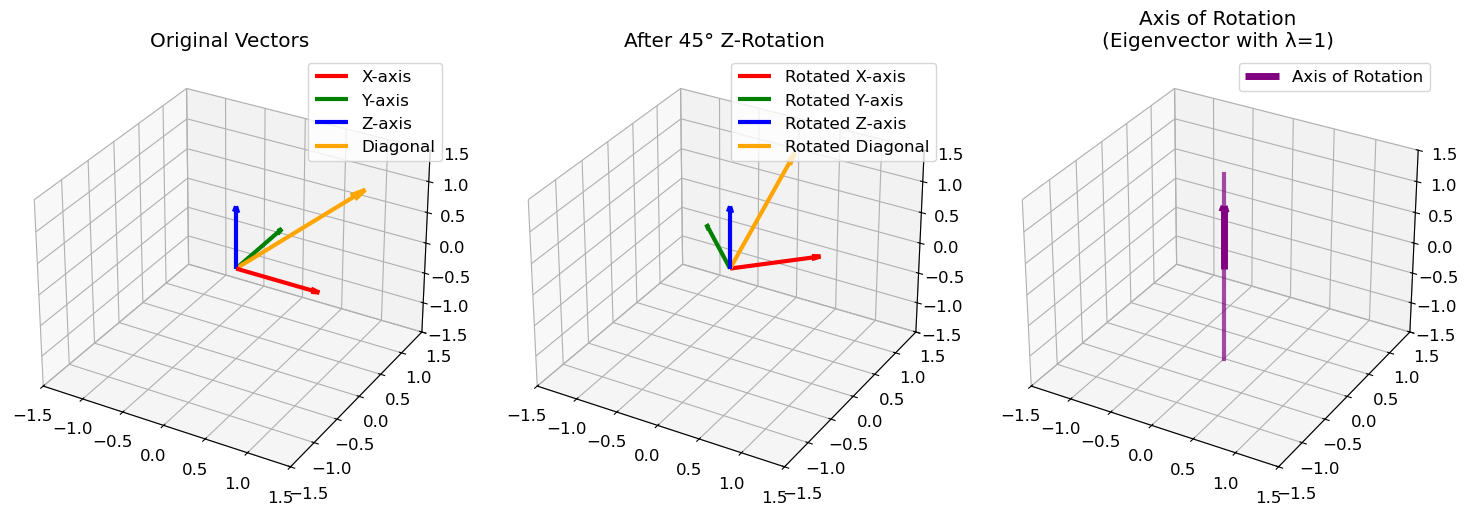

🎯 Key Insight: In 3D rotations, the eigenvector with eigenvalue λ=1
   reveals the axis of rotation - the line that remains unchanged!


In [4]:
# Case 4: 3D Rotation around Z-axis
def create_3d_rotation_z(angle_degrees):
    """Create a 3D rotation matrix around the z-axis"""
    theta = np.radians(angle_degrees)
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,              0,             1]
    ])

# 45-degree rotation around z-axis
rotation_3d = create_3d_rotation_z(45)

print("🌐 Case 4: 3D Rotation Matrix (45° around z-axis)")
print(rotation_3d)
print()

# Analyze eigenvalues and eigenvectors
eigenvals_3d, eigenvecs_3d = np.linalg.eig(rotation_3d)

print("🔬 3D Rotation Analysis:")
print("="*30)
print(f"Eigenvalues: {eigenvals_3d}")
print()

for i, (val, vec) in enumerate(zip(eigenvals_3d, eigenvecs_3d.T)):
    print(f"λ_{i+1} = {val}")
    print(f"v_{i+1} = [{vec[0]:.3f}, {vec[1]:.3f}, {vec[2]:.3f}]")
    
    # Check if this is the axis of rotation (eigenvalue = 1)
    if np.isreal(val) and np.abs(val - 1) < 1e-10:
        print("  🎯 This is the AXIS OF ROTATION! (λ = 1)")
        axis_vector = np.real(vec)
        print(f"  Normalized axis: [{axis_vector[0]:.3f}, {axis_vector[1]:.3f}, {axis_vector[2]:.3f}]")
    elif np.isreal(val) and np.abs(val + 1) < 1e-10:
        print("  🔄 This represents a 180° rotation component")
    else:
        print("  🌀 This is a complex eigenvalue (rotation in the xy-plane)")
    print()

# Visualize in 3D
fig = plt.figure(figsize=(15, 5))

# Test vectors in 3D
test_vectors_3d = {
    'X-axis': np.array([1, 0, 0]),
    'Y-axis': np.array([0, 1, 0]), 
    'Z-axis': np.array([0, 0, 1]),
    'Diagonal': np.array([1, 1, 1])
}

# Plot original vectors
ax1 = fig.add_subplot(131, projection='3d')
colors_3d = ['red', 'green', 'blue', 'orange']

for i, (name, vec) in enumerate(test_vectors_3d.items()):
    ax1.quiver(0, 0, 0, vec[0], vec[1], vec[2], 
              color=colors_3d[i], arrow_length_ratio=0.1, 
              linewidth=3, label=name)

ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_zlim([-1.5, 1.5])
ax1.set_title('Original Vectors')
ax1.legend()

# Plot transformed vectors
ax2 = fig.add_subplot(132, projection='3d')

for i, (name, vec) in enumerate(test_vectors_3d.items()):
    transformed_vec = rotation_3d @ vec
    ax2.quiver(0, 0, 0, transformed_vec[0], transformed_vec[1], transformed_vec[2], 
              color=colors_3d[i], arrow_length_ratio=0.1, 
              linewidth=3, label=f'Rotated {name}')

ax2.set_xlim([-1.5, 1.5])
ax2.set_ylim([-1.5, 1.5])
ax2.set_zlim([-1.5, 1.5])
ax2.set_title('After 45° Z-Rotation')
ax2.legend()

# Plot the axis of rotation
ax3 = fig.add_subplot(133, projection='3d')

# Find the real eigenvector with eigenvalue 1
for i, (val, vec) in enumerate(zip(eigenvals_3d, eigenvecs_3d.T)):
    if np.isreal(val) and np.abs(val - 1) < 1e-10:
        axis_of_rotation = np.real(vec)
        # Plot the axis
        ax3.quiver(0, 0, 0, axis_of_rotation[0], axis_of_rotation[1], axis_of_rotation[2], 
                  color='purple', arrow_length_ratio=0.1, linewidth=5, 
                  label='Axis of Rotation')
        # Extend the axis
        extended_axis = np.linspace(-1.5, 1.5, 100)
        ax3.plot(extended_axis * axis_of_rotation[0], 
                extended_axis * axis_of_rotation[1], 
                extended_axis * axis_of_rotation[2], 
                'purple', linewidth=3, alpha=0.7)

ax3.set_xlim([-1.5, 1.5])
ax3.set_ylim([-1.5, 1.5])
ax3.set_zlim([-1.5, 1.5])
ax3.set_title('Axis of Rotation\n(Eigenvector with λ=1)')
ax3.legend()

plt.tight_layout()
plt.show()

print("🎯 Key Insight: In 3D rotations, the eigenvector with eigenvalue λ=1")
print("   reveals the axis of rotation - the line that remains unchanged!")

In [ ]:
# Let's explore rotations around different axes
def analyze_3d_rotation(axis_name, rotation_matrix):
    """Analyze a 3D rotation and find its axis"""
    eigenvals, eigenvecs = np.linalg.eig(rotation_matrix)
    
    print(f"🔄 Rotation around {axis_name}:")
    
    # Find the axis of rotation (eigenvalue = 1)
    for i, (val, vec) in enumerate(zip(eigenvals, eigenvecs.T)):
        if np.isreal(val) and np.abs(val - 1) < 1e-10:
            axis_vector = np.real(vec)
            # Normalize for clarity
            axis_vector = axis_vector / np.linalg.norm(axis_vector)
            print(f"  Axis of rotation: [{axis_vector[0]:.3f}, {axis_vector[1]:.3f}, {axis_vector[2]:.3f}]")
            
            # Identify which standard axis this is closest to
            axes = {'X': [1,0,0], 'Y': [0,1,0], 'Z': [0,0,1]}
            best_match = max(axes.keys(), key=lambda k: abs(np.dot(axis_vector, axes[k])))
            similarity = abs(np.dot(axis_vector, axes[best_match]))
            
            if similarity > 0.99:
                print(f"  → This is the {best_match}-axis! ✅")
            else:
                print(f"  → Custom axis (closest to {best_match}-axis)")
            break
    print()

print("🌐 Exploring Different 3D Rotation Axes:")
print("="*50)

# Rotation around X-axis (30°)
rotation_x = np.array([
    [1, 0, 0],
    [0, np.cos(np.pi/6), -np.sin(np.pi/6)],
    [0, np.sin(np.pi/6), np.cos(np.pi/6)]
])

# Rotation around Y-axis (30°)  
rotation_y = np.array([
    [np.cos(np.pi/6), 0, np.sin(np.pi/6)],
    [0, 1, 0],
    [-np.sin(np.pi/6), 0, np.cos(np.pi/6)]
])

# We already have rotation around Z-axis
analyze_3d_rotation("X-axis (30°)", rotation_x)
analyze_3d_rotation("Y-axis (30°)", rotation_y)  
analyze_3d_rotation("Z-axis (45°)", rotation_3d)

# Custom rotation around arbitrary axis
# Rotation around the vector [1,1,1] (45°)
axis = np.array([1, 1, 1]) / np.sqrt(3)  # Normalize
angle = np.pi/4  # 45 degrees

# Rodrigues' rotation formula
K = np.array([
    [0, -axis[2], axis[1]],
    [axis[2], 0, -axis[0]], 
    [-axis[1], axis[0], 0]
])

rotation_custom = np.eye(3) + np.sin(angle) * K + (1 - np.cos(angle)) * (K @ K)

analyze_3d_rotation("diagonal [1,1,1] axis (45°)", rotation_custom)

print("🎯 Universal Truth: Every 3D rotation has an axis of rotation!")
print("   The eigenvector with λ=1 always reveals this axis.")

## 🎯 Summary: Special Eigen-Cases

### What We've Learned

We explored four special cases that provide deep insights into eigenvalue problems:

| **Case** | **Transformation** | **Special Property** | **All Vectors Eigenvectors?** |
|----------|-------------------|---------------------|-------------------------------|
| **1. Uniform Scaling** | $k \cdot I$ | Every vector is eigenvector | ✅ YES (λ = k) |
| **2. 180° Rotation** | $-I$ | Only rotation with real eigenvectors | ✅ YES (λ = -1) |
| **3. Combined Transform** | Complex matrix | Hidden, non-obvious eigenvectors | ❌ NO |
| **4. 3D Rotation** | 3D rotation matrix | Reveals axis of rotation | ❌ NO (only axis) |

### Key Mathematical Insights

1. **Uniform Scaling**: $A\mathbf{v} = k\mathbf{v}$ for ALL vectors $\mathbf{v}$
   - Every direction is "characteristic" of the transformation

2. **180° Rotation**: $A\mathbf{v} = -\mathbf{v}$ for ALL vectors $\mathbf{v}$
   - Preserves all directions but flips orientation

3. **Complex Transformations**: Eigenvectors may not align with coordinate axes
   - Mathematical computation becomes essential

4. **3D Rotations**: Always have axis of rotation as eigenvector
   - Physical interpretation: the line that doesn't move during rotation

### Extending to Higher Dimensions

The same principles apply in higher dimensions:
- **Uniform scaling** in n-D: All vectors are eigenvectors
- **Rotations** in n-D: Complex eigenvalue structure reveals rotation planes
- **Machine Learning**: Eigenproblems in 100s or 1000s of dimensions!

### Why This Matters

These special cases show us:
- 🔍 **When problems are simple**: Uniform scaling, 180° rotation
- 🧮 **When we need computation**: Complex transformations  
- 🌐 **Physical interpretations**: Rotation axes in 3D
- 📈 **Scaling to real applications**: High-dimensional data analysis

The geometric intuition we've built here prepares us for:
- **Principal Component Analysis (PCA)**
- **Spectral clustering** 
- **Quantum mechanics**
- **Vibration analysis**
- **Google PageRank algorithm**

In [ ]:
# 🧪 Practice Exercise: Test Your Understanding!

def interactive_exercise():
    """
    Interactive exercise to test understanding of special eigen-cases
    """
    print("🧩 CHALLENGE: Analyze These Mystery Transformations!")
    print("="*60)
    
    # Mystery matrices for students to analyze
    mysteries = [
        {
            'name': 'Mystery Matrix A',
            'matrix': np.array([[2, 0], [0, 2]]),
            'hint': 'Look at the diagonal...'
        },
        {
            'name': 'Mystery Matrix B', 
            'matrix': np.array([[-1, 0], [0, -1]]),
            'hint': 'What angle of rotation is this?'
        },
        {
            'name': 'Mystery Matrix C',
            'matrix': np.array([[0, -1], [1, 0]]),
            'hint': 'This is a 90° rotation...'
        },
        {
            'name': 'Mystery Matrix D',
            'matrix': np.array([[1, 2], [0, 1]]),
            'hint': 'Pure shear transformation...'
        }
    ]
    
    for mystery in mysteries:
        print(f"\n{mystery['name']}:")
        print(mystery['matrix'])
        print(f"Hint: {mystery['hint']}")
        print("\nQuestions to consider:")
        print("1. What type of transformation is this?")
        print("2. Do all vectors become eigenvectors?")
        print("3. What are the eigenvalues?")
        print("4. Can you predict the eigenvectors?")
        print()
        print("Uncomment the lines below to see the analysis:")
        print(f"# analyze_eigenvalues({mystery['name'].lower().replace(' ', '_')}, '{mystery['name']}')")
        print("# plot_transformation_with_eigenvectors(matrix, title)")
        print("-" * 50)

interactive_exercise()

# Students can uncomment these to check their predictions:
# mystery_a = np.array([[2, 0], [0, 2]])
# mystery_b = np.array([[-1, 0], [0, -1]]) 
# mystery_c = np.array([[0, -1], [1, 0]])
# mystery_d = np.array([[1, 2], [0, 1]])

print("\n🎓 Learning Tips:")
print("1. Always start with geometric intuition")
print("2. Check if it's a special case (uniform scaling, 180° rotation)")
print("3. Use computation for complex cases")
print("4. Verify your results with the eigenvalue equation: Av = λv")